# Computer Assignment 2

Due Date 21 กันยายน 2566 ก่อนเวลา 23.00 น.

ให้ส่งเป็น pdf file ผ่านระบบที่ mango.cmu.ac.th เท่านั้น

Note ห้าม ใช้ library หรือ โปรแกรมสำหรับรูปใดๆ ทั้งสิ้น จะต้องเขียนโปรแกรมด้วยตัวเองทั้งหมด ห้าม ลอกงานคนอื่นถ้าลอกกันมา ทั้งคนให้ลอกและคนลอกจะได้รับคะแนนเป็น 0 ทั้งคู่ และให้แนบ program มาในส่วนของภาคผนวกของรายงานด้วย

การบ้านนี้มี 2 ข้อ

## 2.2 จงทำการทดลองโดยใช้ string grammar Hard C-means 
โดยใช้ data set ของ Copenhagen Chromosome Database ให้ใช้ train data set ในการ train (ชื่อ file จะเป็น difxda เช่น dif1da) และ test data set  (ชื่อ file จะเป็น difxdb เช่น dif1db) ในการ test ข้อมูลของ data set อยู่ที่ http://myweb.cmu.ac.th/sansanee.a/PatRecG/dataset/chrom.zip ทั้งนี้ data set มีจำนวน chromosome ทั้งหมด 2200 chromosome อย่าลืมอ่านคำแนะนำ data set ใน file CopenhagenChromosomeDataset.html ด้วย

 

รายงานควรจะประกอบด้วย

            1. รายละเอียดของทฤษฎีหรือวิธีการต่างๆที่ใช้

            2. การออกแบบ algorithm เช่น pseudo-code, flowchart, ฯลฯ

            3. ผลการทดลอง

            4. การวิเคราะห์การทดลอง เช่น ได้ผลตามที่คาดไว้หรือไม่ มีสิ่งประหลาดเกิดขึ้นหรือไม่ บทสรุปที่ได้คืออะไร ฯลฯ

            5. Well documented, structured, modular program listing

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# grab the name of files in the directory 'chrom'
# excluding the file with 'html' extension
# and store the names in a list

chrom_files = glob.glob('chrom/*')
chrom_files = [x for x in chrom_files if 'html' not in x]
print(f'# of files: {len(chrom_files)}')

# files ending with a are training data
# files ending with b are testing data

# list of training data
train_files = [x for x in chrom_files if 'a' in x]
print(f'# of training files: {len(train_files)}')

# list of testing data
test_files = [x for x in chrom_files if 'b' in x]
print(f'# of testing files:  {len(test_files)}')

# of files: 44
# of training files: 22
# of testing files:  22


In [4]:
# function that reads the contents of a file
# and returns a list of lines
def read_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # for each line, take only the string after '\t' and before '\n'
    lines = [x.split('\t')[1].split('\n')[0] for x in lines]

    return lines


In [5]:
# read all the training data
training_data = [read_file(x) for x in train_files]
# flatten the list of lists
training_data = [item for sublist in training_data for item in sublist]
print(f'# of training data: {len(training_data)}')

# read all the testing data
test_data = [read_file(x) for x in test_files]
# flatten the list of lists
test_data = [item for sublist in test_data for item in sublist]
print(f'# of testing data: {len(test_data)}')

# of training data: 2200
# of testing data: 2200


# Levenshtein distance

In [6]:
# define Levenshtein distance function
def levenshtein_distance(s1, s2):
    # if one of the strings is empty, return the length of the other string
    if len(s1) == 0:
        return len(s2)
    if len(s2) == 0:
        return len(s1)

    # if the last characters of the strings are the same,
    # return the distance between the strings without the last character
    if s1[-1] == s2[-1]:
        return levenshtein_distance(s1[:-1], s2[:-1])

    # otherwise, return the minimum of the following:
    # 1. distance between s1 and s2 without the last character of s1
    # 2. distance between s1 and s2 without the last character of s2
    # 3. distance between s1 and s2 without the last character of both s1 and s2
    return 1 + min(levenshtein_distance(s1[:-1], s2),
                   levenshtein_distance(s1, s2[:-1]),
                   levenshtein_distance(s1[:-1], s2[:-1]))



In [7]:
# Example usage:
string1 = "kitten"
string2 = "sitting"
distance = levenshtein_distance(string1, string2)
print(f"Levenshtein distance between '{string1}' and '{string2}' is {distance}")

Levenshtein distance between 'kitten' and 'sitting' is 3


In [8]:
def levenshtein_distance(s1, s2):
    # Create a matrix to store the distances between substrings of s1 and s2
    dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    # Initialize the first row and column of the matrix
    for i in range(len(s1) + 1):
        dp[i][0] = i
    for j in range(len(s2) + 1):
        dp[0][j] = j

    # Fill in the matrix using dynamic programming
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost  # Substitution
            )

    # The final value in the bottom-right corner of the matrix is the Levenshtein distance
    return dp[len(s1)][len(s2)]

In [9]:
# Example usage:
string1 = "kitten"
string2 = "sitting"
distance = levenshtein_distance(string1, string2)
print(f"Levenshtein distance between '{string1}' and '{string2}' is {distance}")

Levenshtein distance between 'kitten' and 'sitting' is 3


# Visualize data

/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


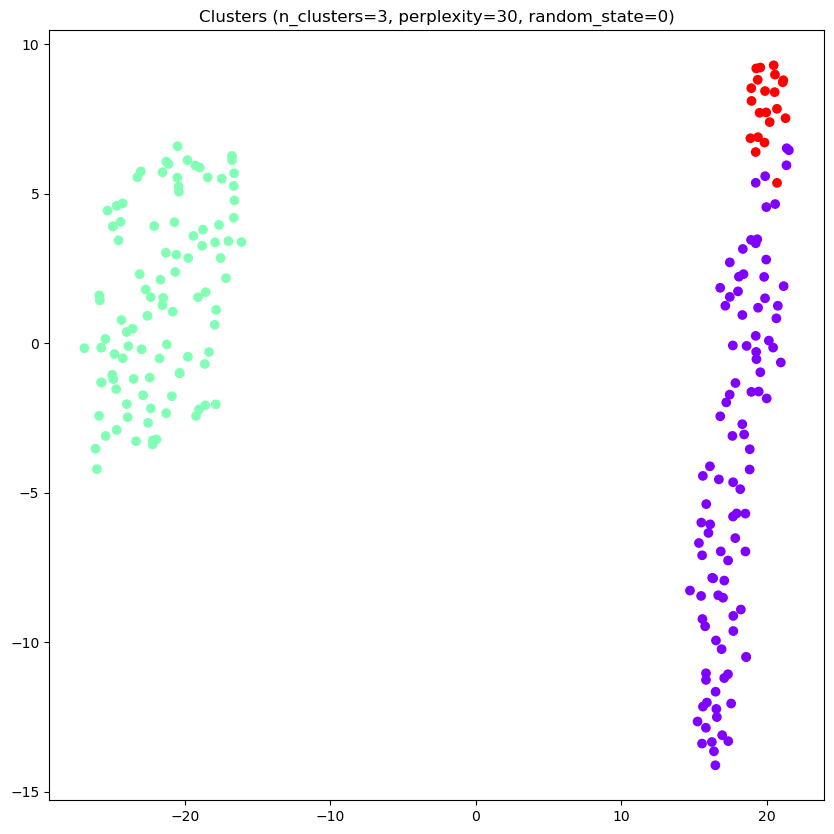

In [10]:
# use levenshtein_distance function to compute the distance between all strings in training_data
# plot the distances as clusters and t-SNE
# use the following code to plot the clusters and t-SNE
# you can change the number of clusters and perplexity value
# but do not change the random_state value
# you can also change the colors of the clusters
# but do not change the colors of the t-SNE plot

from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# take 10% of train_data and compute the distance between all strings 
# number of strings to take
n = int(len(training_data) * 0.1)

# take n strings from training_data
strings = training_data[:n]

# compute the distance between all strings
distances = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distances[i, j] = levenshtein_distance(strings[i], strings[j])

# plot the clusters and t-SNE
# number of clusters
n_clusters = 3

# perplexity value for t-SNE
perplexity = 30

# random state value for t-SNE
random_state = 0

# compute t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state).fit_transform(distances)

# cluster the strings using AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(distances)

# plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(tsne[:, 0], tsne[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title(f'Clusters (n_clusters={n_clusters}, perplexity={perplexity}, random_state={random_state})')
plt.show()


# String grammar hard C-means

In [11]:
class sgHCM:
    # first, initial the class with k value
    # then, call the class with test sample and train data
    def __init__(self, k=3, max_iter=10, tol=1e-5):
        # number of clusters
        self.k = k
        # maximum iteration
        self.max_iter = max_iter
        # tolerance (epsilon)
        self.tol = tol
        # initialize the list of distances between old and new centroids very high
        self.Et = np.inf
        self.train_data = None
        self.centroids = None

    def __call__(self, test_sample):
        # compute the distance between test_sample and the centroids
        self.distances = self.compute_distance(test_sample, self.centroids)

        # find the index of the closest centroid
        closest_centroid = np.argmin(self.distances)

        # assign the test sample to the closest centroid
        self.predicted_label = closest_centroid

        return self.predicted_label, self.centroids[closest_centroid]
        
    def fit(self, train_data):
        self.train_data = train_data
        # randomly select k centroids from train_data (or prototype vectors)
        self.centroids = np.random.choice(train_data, size=self.k, replace=False)
        print(f'Initial centroids: {self.centroids}')

        # initialize the list of clusters
        self.clusters = [[] for _ in range(self.k)]

        # initialize the list of old centroids
        self.old_centroids = None

        # initialize the list of new centroids
        self.new_centroids = None

        # initialize the list of distances between test sample and each train data
        self.distances = None

        # initialize the list of predicted labels
        self.predicted_label = None

        self.u_ik = None
        self.n_it = None

        for t in range(self.max_iter):
            print(f'\nIteration {t + 1}')
            # assign each train data to the closest centroid
            self.clusters, self.u_ik = self.assign_clusters(train_data)

            # number of train samples in each cluster
            print(f'Number of train samples in each cluster: {self.n_it}')
            # print shape of u_ik
            print(f'Shape of u_ik: {self.u_ik.shape}')

            # n_it is the number of train samples in the i-th cluster
            self.n_it = np.sum(self.u_ik, axis=0)

            # update the centroids
            self.old_centroids = self.centroids
            print(f'Old centroids: {self.old_centroids}')
            self.new_centroids = self.update_centroids(train_data)
            
            _ = self.centroids_uniqueness(self.new_centroids)
            # print(f'New centroids: {self.new_centroids}')

            # compute the difference between old and new centroids
            self.Et = self.compute_terminal_measure(self.old_centroids, self.new_centroids)

            # if the difference is less than the tolerance, stop the iteration
            if self.Et < self.tol:
                break

            # otherwise, update the centroids and continue
            self.centroids = self.new_centroids

        print(f'Final centroids: {self.centroids}')
        # return the list of clusters
        return self.clusters

    def assign_clusters(self, train_data):
        # compute the distance between the train data and each centroid
        print(f'Assigning clusters...')
        # initialize the list of clusters
        clusters = [[] for _ in range(self.k)]

        # for each train data
        for i, train_sample in enumerate(train_data):
            # compute the distance between test_sample and the centroid
            self.distances = self.compute_distance(train_sample, self.centroids)

            # find the index of the closest centroid
            closest_centroid = np.argmin(self.distances)

            # assign the train sample to the closest centroid
            clusters[closest_centroid].append(i)

        # create the u_ik matrix, which is a matrix of 0s and 1s
        # u_ik[i][j] = 1 if the i-th train sample belongs to the j-th cluster
        # u_ik[i][j] = 0 otherwise
        u_ik = np.zeros((len(train_data), self.k))
        for i, cluster in enumerate(clusters):
            for j in cluster:
                u_ik[j][i] = 1

        self.n_it = np.sum(u_ik, axis=0)

        return clusters, u_ik
    
    def update_centroids(self, train_data):
        # compute the distance between each sample and other samples in the same cluster
        # the sample with the minimum sum of the distances to other samples in the same cluster is the new centroid for that cluster  

        # initialize the list of new centroids
        new_centroids = []

        # for each cluster
        for i in range(len(self.clusters)):
            # c_ij is a list of the sum of the distances to other samples in the same cluster
            c_ij = []

            for j in range(len(self.clusters[i])):
                # compute the distance between the sample and other samples in the same cluster excluding itself
                # list of samples excluding the sample itself
                samples = [x for x in self.clusters[i] if x != j]

                # take train_data at the index of samples
                train = np.array(train_data.copy())
                other_samples = train[samples]

                distances = self.compute_distance(train_data[j], other_samples)
                
                c_ij.append(np.sum(distances/self.n_it[i], axis=0))

            # find the index of the sample with the minimum sum 
            # of the distances to other samples in the same cluster
            alpha_q = np.argmin(c_ij)
            print(f'New centroid for cluster {i}: {train_data[alpha_q]}')

            # add the new centroid to the list
            new_centroids.append(train_data[alpha_q])

        return new_centroids
    
    def centroids_uniqueness(self, centroids):
        # check if the new centroids are unique
        # return True if the new centroids are unique
        # return False if the new centroids are not unique
        # print(f'Checking centroids uniqueness...')
        for i in range(len(centroids)):
            for j in range(len(centroids)):
                if i != j:
                    if centroids[i] == centroids[j]:
                        print(f'Found centroids not unique')
                        return False
        return True
    
    def levenshtein_distance(self, s1, s2):
        # Create a matrix to store the distances between substrings of s1 and s2
        dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

        # Initialize the first row and column of the matrix
        for i in range(len(s1) + 1):
            dp[i][0] = i
        for j in range(len(s2) + 1):
            dp[0][j] = j

        # Fill in the matrix using dynamic programming
        for i in range(1, len(s1) + 1):
            for j in range(1, len(s2) + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(
                    dp[i - 1][j] + 1,  # Deletion
                    dp[i][j - 1] + 1,  # Insertion
                    dp[i - 1][j - 1] + cost  # Substitution
                )

        # The final value in the bottom-right corner of the matrix is the Levenshtein distance
        return dp[len(s1)][len(s2)]

    def compute_distance(self, test_sample, train_data):
        # compute the distance between test_sample and each train data
        # return a list of distances
        distances = []
        for train_sample in train_data:
            distance = self.levenshtein_distance(test_sample, train_sample)
            distances.append(distance)
        return distances
    
    def compute_terminal_measure(self, old_V, new_V):
        # compute the levenstein distance between old and new centroids
        # return the sum of the levenstein distances
        Et = []
        print(f'Computing terminal measure (Et)')
        for i in range(len(old_V)):
            Et.append(self.levenshtein_distance(old_V[i], new_V[i]))
    
        Et = np.array(Et)
        Et = np.sum(Et)
        print(f'Et = {Et}')

        # return the tolerance
        return Et
    
# perform 10-fold cross validation on sgHCM classifier
def cross_validation(train_data, test_data, fold=10):
    # shuffle data before cross validation
    np.random.shuffle(train_data)
    fold_size = len(train_data) // fold

    for i in range(fold):
        # take one fold as training data
        data_train_fold = train_data[i * fold_size:(i + 1) * fold_size]
        data_test_fold = test_data[:i * fold_size:(i + 1) * fold_size]

        ############################################# sgHCM classifier #################################################
        print(f"\nFold {i+1}")
        print(f"Training data: {len(data_train_fold)}")
        classifier = sgHCM(k=3)
        classifier.fit(data_train_fold)

        print('\nPredicting the test dataset...')
        predictions = []
        for test_sample in data_test_fold:
            predicted_label, predicted_centroids = classifier(test_sample)
            predictions.append([test_sample, predicted_label, predicted_centroids])
        # show results of the first 5 test samples
        print(f'Predictions: (test sample, predicted label, predicted centroid)')
        for prediction in predictions[:5]:
            print(prediction)
        
        ################################# end #################################

cross_validation(training_data, test_data, fold=10)


Fold 1
Training data: 220
Initial centroids: ['A=A=a===E====e=========a' 'A=A=a=====E===d=====A==ab'
 'A=======D===b===A===a===A==a==C===aA==a=A==c=======B==d=======a']

Iteration 1
Assigning clusters...
Number of train samples in each cluster: [106.  13. 101.]
Shape of u_ik: (220, 3)
Old centroids: ['A=A=a===E====e=========a' 'A=A=a=====E===d=====A==ab'
 'A=======D===b===A===a===A==a==C===aA==a=A==c=======B==d=======a']
New centroid for cluster 0: A====A==a=====E==d===B==c========a
New centroid for cluster 1: A===D==c===D===d===Aa==A=b====a
New centroid for cluster 2: A==A=a===B======a==A===b=========E====e=======A==a=a
Computing terminal measure (Et)
Et = 43

Iteration 2
Assigning clusters...
Number of train samples in each cluster: [ 80.  26. 114.]
Shape of u_ik: (220, 3)
Old centroids: ['A====A==a=====E==d===B==c========a', 'A===D==c===D===d===Aa==A=b====a', 'A==A=a===B======a==A===b=========E====e=======A==a=a']
New centroid for cluster 0: A====A==a=====E==d===B==c========a
New c